In [4]:
#Add the folder to the path:
import sys
sys.path.append('../')
from qutip import (about, basis, expect, mesolve, qeye, sigmax, sigmay, sigmaz, tensor, mcsolve, sesolve, mesolve)
from qutip.expect import expect
import numpy as np
from util.samplers_util import thermal_rejection
import matplotlib.pyplot as plt
from util.basic_TFIM_funcs import get_s_lists
from joblib import Parallel, delayed

import os

#Move the directory back to Duke_Data
#Check if the current directory is Duke_Data
if os.getcwd().split('/')[-1] != 'DUKE_ANALOG_ZNE_DATA':
    #os.chdir('Duke_Data')
    os.chdir('../')
    #print(os.getcwd().split('/')[-1])
    #pass
else:
    pass
print(os.getcwd())
from util.functions_util import cetina_thermal_exp, cetina_envelope_exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import numpy as np
import h5py
from util.fitting_functions_ZNE import linear_ZNE, third_no_first_ZNE, quadratic_only_ZNE, exp_ZNE, log_fit_exp_ZNE, gaussian_ZNE
# import all the useful lib in python
from matplotlib import artist as art
%matplotlib inline
import scipy as sp
# import pandas as pd
import pathlib
import os
import datetime as dt
import glob
from IPython.display import clear_output
from numpy.fft import fft, ifft

from util.h5analysis import *
from util.qsim_functions import*


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


/Users/thomassteckmann/Duke_Analog_ZNE_data


In [5]:
data_folder = 'Jij_SPAM_15'
data_names = [231, 232, 233, 234, 236]
info = ['0000', '1111', '0101', '0100', '1111']
prefix = '000575'
shots = 2000
qubits = (2,3,4,5)
time_steps = 1
#J = 1.2*np.pi



# data_folder = 'DD_pulses'
# data_names = [844, 864, 872]
# info =       [0, 2, 4]
# prefix = '000572'
# pair = (4,5)
# shots = 200


data_names = [str(name) for name in data_names]
full_data_folder_path = './data/' + data_folder + '/'
for name_index in range(len(data_names)):
    name = data_names[name_index]
    if prefix in name:
        pass
    else:
        name = prefix + name
        data_names[name_index] = name
        

In [6]:
print()
COUNTS_THRESHOLD = 1

print(os.getcwd())



/Users/thomassteckmann/Duke_Analog_ZNE_data


In [7]:
results = np.zeros((len(data_names), 30))
leakage_matrix = np.zeros((30, len(data_names)))
fidelity = np.zeros((30, len(data_names)))

times = None

for file_id_index in range(len(data_names)):
    file_id = data_names[file_id_index]
    #pair = names[0]
    file = h5py.File(full_data_folder_path + file_id + '-RFSoCSequence.h5', 'r')
    archive = file['archive']
    dataset = file['datasets']
    x_vals = dataset['data.rfsoc_pulse_sequence.x_values']
    times = np.array(x_vals)
    #print(times)
    raw_counts = dataset['data.rfsoc_pulse_sequence.raw_counts']
    counts = np.asarray(raw_counts)
    #print(counts.shape)
    print(counts[:,0,0])
    measurements = np.zeros((len(qubits), shots, time_steps))
    for qubit_index in range(len(qubits)):
        qubit = qubits[qubit_index]
        #qubit = pair[pair_index]
        measurements[qubit_index,:,:] = 1 < counts[qubit,:,:]
        #print(measurements)
    #Convert the measurements to bitstrings. Convert to string, then append the like indices
    counts_bitstrings = np.zeros((shots, time_steps), dtype='<U5')
    for i in range(shots):
        for j in range(time_steps):
            bitstring = [str(int(measurements[qubit_index,i,j])) for qubit_index in range(len(qubits))]
            bitstring = "".join(bitstring)
            counts_bitstrings[i,j] = bitstring
    counts_dicts = np.zeros(time_steps, dtype=dict)
    for j in range(time_steps):
        temp_dict = {}#
        for i in range(shots):
            if counts_bitstrings[i,j] in temp_dict:
                temp_dict[counts_bitstrings[i,j]] += 1/shots
            else:
                temp_dict[counts_bitstrings[i,j]] = 1/shots
        counts_dicts[j] = temp_dict
    print(counts_dicts)
    print(info[file_id_index])
    fidelity[file_id_index] = counts_dicts[0][info[file_id_index]]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[{'0000': 0.9884999999999465, '1000': 0.0035, '0100': 0.0035, '0001': 0.002, '0010': 0.0025}]
0000
[ 0.  0. 11. 15. 14. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[{'1111': 0.9649999999999491, '1110': 0.008500000000000004, '0111': 0.010500000000000006, '1101': 0.011000000000000006, '1011': 0.0035, '0101': 0.0005, '1100': 0.001}]
1111
[ 0.  0.  0. 10.  0. 14.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[{'0101': 0.9729999999999482, '1101': 0.007500000000000003, '0100': 0.008500000000000004, '0111': 0.005000000000000001, '0001': 0.005000000000000001, '0000': 0.0005, '1111': 0.0005}]
0101
[ 0.  0.  0. 14.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[{'0100': 0.9779999999999477, '0110': 0.0025, '0000': 0.005500000000000001, '1100': 0.010000000000000005, '0101': 0.0035, '0010': 0.0005}]
0100
[ 0.  0. 14. 11. 16. 19.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[{'1111': 0.9579999999999499, '0111': 0.01450000000000001, '1110': 0.006500000000000002, '1101': 0.01

0.015140374331550794


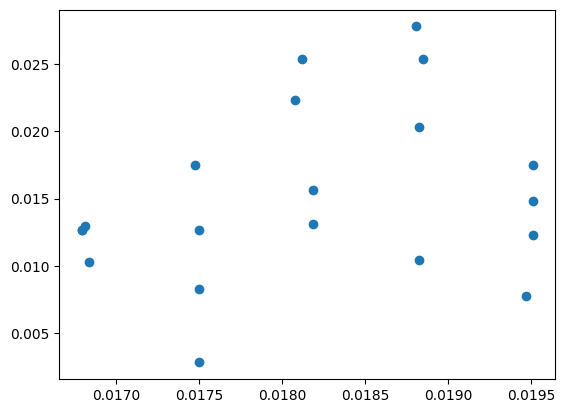

In [9]:
#Plotting Ramp error:
xy_data=[0.018802139037433156, 0.027807486631016037,
0.018844919786096256, 0.025401069518716568,
0.018823529411764704, 0.020320855614973238,
0.018823529411764704, 0.010427807486630997,
0.01946524064171123, 0.00775401069518715,
0.01950802139037433, 0.012299465240641697,
0.01950802139037433, 0.014839572192513348,
0.01950802139037433, 0.017513368983957223,
0.018074866310160427, 0.022326203208556133,
0.01818181818181818, 0.01564171122994651,
0.01818181818181818, 0.013101604278074871,
0.017475935828877003, 0.017513368983957223,
0.017497326203208555, 0.012700534759358284,
0.017497326203208555, 0.008288770053475933,
0.017497326203208555, 0.002807486631016043,
0.01683422459893048, 0.010294117647058815,
0.01681283422459893, 0.012967914438502662,
0.016791443850267377, 0.012700534759358284,
0.016791443850267377, 0.012700534759358284,
0.018117647058823527, 0.025401069518716568]
x_data = xy_data[0::2]
y_data = xy_data[1::2]
plt.plot(x_data, y_data, 'o')
print(np.mean(y_data))

